# Overfitting Linear Regression

The starter code imports Pandas, reads the data into a Dataframe, and cleans up some messy values. The dataset is hosted by the University of California Irvine on their machine learning repository.

In [2]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("data/auto-mpg.data", delim_whitespace=True, names=columns)
cars = cars[cars['horsepower'] != '?']
cars['horsepower'] = cars['horsepower'].astype('float')

Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance.

In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.

* Let's train a linear regression model using:
    * The columns in cols as the features,
    * The mpg column as the target variable.

* Let's use the trained model to make predictions using the same input it was trained on,
* Let's compute the variance (TODO) of the predicted values and the mean squared error between the predicted values and the actual label (mpg column).

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def train_and_test(cols):
    # take in cols: a list of column
    # Returns a tuple (MSE, Variance)
    X = cars[cols]
    y = cars['mpg']
    lr = LinearRegression()
    lr.fit(X, y)
    y_predict = lr.predict(X)
    mse = mean_squared_error(y_predict, y)
    variance = np.var(y_predict)
    return mse, variance
                                
                                
cyl_mse, cyl_var = train_and_test(['cylinders'])

weight_mse, weight_var = train_and_test(['weight'])

print('cyl_mse: {} and cyl_var {}'.format(cyl_mse, cyl_var))
print('weight_mse: {} and weight_var {}'.format(weight_mse, weight_var))

cyl_mse: 24.02017956815553 and cyl_var 36.74255887416017
weight_mse: 18.6766165974193 and weight_var 42.08612184489641


In [4]:
one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", 'displacement'])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"])

In [5]:
one_mse, one_var

(24.02017956815553, 36.742558874160167)

In [6]:
two_mse, two_var

(21.282057055586364, 39.480681386729316)

In [7]:
three_mse, three_var

(20.252954839714231, 40.50978360260148)

In [8]:
five_mse, five_var

(17.76139610540622, 43.001342336909389)

In [9]:
six_mse, six_var

(11.590170981415227, 49.172567460900481)

In [ ]:
seven_mse, seven_var

The multivariate regression models you trained got progressively better at reducing the amount of error.

A good way to detect if your model is overfitting is to compare the in-sample error and the out-of-sample error, or the training error with the test error. So far, we calculated the in sample error by testing the model over the same data it was trained on. To calculate the out-of-sample error, we need to test the data on a test set of data. We unfortunately don't have a separate test dataset and we'll instead use cross validation.

If a model's cross validation error (out-of-sample error) is much higher than the in sample error, then your data science senses should start to tingle. This is the first line of defense against overfitting and is a clear indicator that the trained model doesn't generalize well outside of the training set.

Let's create a new function to handle performing the cross validation and computing the cross validation error.

* Create a function named train_and_cross_val that:
    * takes in a single parameter (list of column names),
    * trains a linear regression model using the features specified in the parameter,
    * uses the KFold class to perform 10-fold validation using a random seed of 3 (we use this seed to answer check your code),
    * calculates the mean squared error across all folds and the mean variance across all folds.
    * returns the mean squared error value then the variance using a multiple return statement (e.g. return(avg_mse, avg_var)).
* Use the train_and_cross_val function to train linear regression models using the following columns as the features:
    * the cylinders and displacement columns. Assign the resulting mean squared error value to two_mse and the resulting variance value to two_var.
    * the cylinders, displacement, and horsepower columns. Assign the resulting mean squared error value to three_mse and the resulting variance value to three_var.
    * the cylinders, displacement, horsepower, and weight columns. Assign the resulting mean squared error value to four_mse and the resulting variance value to four_var.
    * the cylinders, displacement, horsepower, weight, acceleration columns. Assign the resulting mean squared error value to five_mse and the resulting variance value to five_var.
    * the cylinders, displacement, horsepower, weight, acceleration, and model year columns. Assign the resulting mean squared error value to six_mse and the resulting variance value to six_var.
    * the cylinders, displacement, horsepower, weight, acceleration, model year, and origin columns. Assign the resulting mean squared error value to seven_mse and the resulting variance value to seven_var.
    * Use the variable display to inspect each value.

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
def train_and_cross_val(cols):
    # Takes in a list of column names
    # Returns the average MSE and average variance
    X = cars[cols]
    y = cars["mpg"]
    variance_values = []
    mse_values = []

    kf = KFold(n_splits=10, shuffle=True, random_state=3) 
    
    for train_index, test_index in kf.split(X): 
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)
        variance_values.append(var)
        mse_values.append(mse)

    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
one_mse, one_var = train_and_cross_val(["cylinders"])
two_mse, two_var = train_and_cross_val(["cylinders", 'displacement'])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"])

In [12]:
one_mse, one_var

(24.271251604850704, 35.99007106231538)

In [13]:
two_mse, two_var

(21.584370274954374, 38.902525313756023)

In [14]:
three_mse, three_var

(20.655622193882955, 40.091287956606941)

In [15]:
four_mse, four_var

(18.169683239081884, 42.507643643644386)

In [16]:
five_mse, five_var

(18.283038517172052, 42.598736300146825)

In [17]:
six_mse, six_var

(12.09968542546712, 48.928246967718017)

In [18]:
seven_mse, seven_var

(11.418131971812052, 49.90431373098729)

During cross validation, the more features we added to the model, the lower the mean squared error got. This is a good sign and indicates that the model generalizes well to new data it wasn't trained on. As the mean squared error value went down, however, the variance of the predictions went up. This is to be expected, since the models with lower squared error values had higher model complexity, which tends to be more sensitive to small variations in input values (or high variance).

For each model, let's plot the error and variance to get a better idea of the tradeoff as the number of features increased.

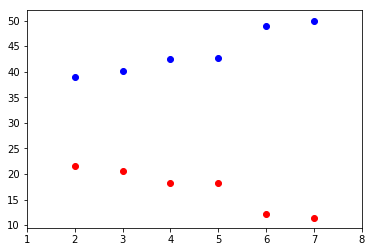

In [20]:
import matplotlib.pyplot as plt
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
cols = ["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"]
mse_list = []
var_list = []
nb_features = len(cols)
for i in range(nb_features):
    mse, var = train_and_cross_val(cols[:i+1])   
    mse_list.append(mse)
    var_list.append(var)


plt.scatter([2,3,4,5,6,7], mse_list[1:], c='r')
plt.scatter([2,3,4,5,6,7], var_list[1:], c='b')
plt.xlim(1, 8)
plt.show()
    

While the higher order multivariate models overfit in relation to the lower order multivariate models, the in-sample error and out-of-sample didn't deviate by much. The best model was around 50% more accurate than the simplest model. On the other hand, the overall variance increased around 25% as we increased the model complexity. The increased variance with the increased model complexity means that your model will have more unpredictable performance on truly new, unseen data.

You need to confirm the predictive accuracy of the model using completely new, unobserved data (e.g. maybe from cars from later years). Since often you can't wait until a model is deployed in the wild to know how well it works, the exploration we did in this mission helps you approximate a model's real world performance.